In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
## models
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Shreyashchawda12/US_HOME_PRICE/main/US_HPI_dataset')


In [3]:
df.head()

,DATE,MSACSR,UNRATE,MAVR,DSPI,PMSAVE,PCE,OECD_GDP,RGDP,DR,HPI
0,2002-01-01,4.2,5.7,6.9975,9951.9,451.1,7184.6,99.121440,13394.910,2.24,117.143
1,2002-02-01,4.0,5.7,6.8925,9966.6,437.5,7225.2,99.117811,13394.910,2.24,117.845
2,2002-03-01,4.1,5.7,7.0140,9973.3,448.6,7243.4,99.111637,13394.910,2.24,118.686
3,2002-04-01,4.3,5.9,6.9850,10007.2,440.7,7312.5,99.093106,13477.356,2.16,119.610
4,2002-05-01,4.0,5.8,6.8060,10047.9,504.4,7288.9,99.055417,13477.356,2.16,120.724


In [4]:
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.set_index('DATE')

In [5]:
df

,MSACSR,UNRATE,MAVR,DSPI,PMSAVE,PCE,OECD_GDP,RGDP,DR,HPI
DATE,,,,,,,,,,
2002-01-01,4.2,5.7,6.9975,9951.9,451.1,7184.6,99.121440,13394.910,2.24,117.143
2002-02-01,4.0,5.7,6.8925,9966.6,437.5,7225.2,99.117811,13394.910,2.24,117.845
2002-03-01,4.1,5.7,7.0140,9973.3,448.6,7243.4,99.111637,13394.910,2.24,118.686
2002-04-01,4.3,5.9,6.9850,10007.2,440.7,7312.5,99.093106,13477.356,2.16,119.610
2002-05-01,4.0,5.8,6.8060,10047.9,504.4,7288.9,99.055417,13477.356,2.16,120.724
...,...,...,...,...,...,...,...,...,...,...
2023-01-01,8.1,3.4,6.2725,15504.7,785.3,18076.6,99.994540,20282.760,1.74,296.601
2023-02-01,8.4,3.6,6.2575,15545.3,836.1,18123.9,100.014996,20282.760,1.74,296.958
2023-03-01,8.1,3.5,6.5440,15598.6,901.2,18138.7,100.031746,20282.760,1.74,298.210


In [6]:
x = df.drop(labels=['HPI'],axis=1)
y = df[['HPI']]

In [7]:
feature_names = ['MSACSR', 'UNRATE', 'MAVR', 'DSPI', 'PMSAVE', 'PCE', 'OECD_GDP', 'RGDP', 'DR']

In [8]:
feature_names

['MSACSR', 'UNRATE', 'MAVR', 'DSPI', 'PMSAVE', 'PCE', 'OECD_GDP', 'RGDP', 'DR']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [10]:
X_train

,MSACSR,UNRATE,MAVR,DSPI,PMSAVE,PCE,OECD_GDP,RGDP,DR
DATE,,,,,,,,,
2012-05-01,4.7,8.2,3.7980,12490.2,1066.9,11006.8,100.227304,16253.726,10.45
2015-09-01,5.9,5.0,3.8900,13392.0,1024.8,12356.4,100.292958,17437.080,5.39
2022-05-01,8.3,3.6,5.2300,15036.4,616.0,17231.1,99.795936,19895.271,1.96
2020-11-01,4.0,6.7,2.7650,15522.5,2311.5,14561.0,97.726275,18924.262,2.74
2004-06-01,3.9,5.6,6.2875,10631.8,504.3,8157.6,99.724319,14323.017,1.60
...,...,...,...,...,...,...,...,...,...
2010-11-01,8.2,9.8,4.3000,11960.5,703.7,10433.6,99.746651,15807.995,10.33
2003-03-01,4.1,5.9,5.7450,10121.5,415.9,7611.5,98.371757,13619.434,1.97
2009-09-01,7.8,9.8,5.0575,11573.1,607.4,9927.8,98.020415,15216.647,9.48


In [11]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,  rmse, r2_square

In [12]:
models = {
    "Linear_Regression":LinearRegression(),
    "Lasso":Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'svm':SVR(kernel = 'rbf'),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    
   
    
    
}

trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

Linear_Regression
Model Training Performance
RMSE: 6.923386990241004
MAE: 5.625670394545511
R2 score 97.52482377184548


Lasso
Model Training Performance
RMSE: 7.676633511631874
MAE: 6.31405112231014
R2 score 96.95693993176411


Ridge
Model Training Performance
RMSE: 6.932321693722909
MAE: 5.625345639450636
R2 score 97.51843116790965


Elasticnet
Model Training Performance
RMSE: 8.75161561138044
MAE: 7.399768241278553
R2 score 96.04501010057095


svm
Model Training Performance
RMSE: 39.03147719868202
MAE: 27.740542053878954
R2 score 21.331859244893515


DecisionTreeRegressor
Model Training Performance
RMSE: 2.9261871511558746
MAE: 1.9660897435897442
R2 score 99.55784645835378


RandomForestRegressor
Model Training Performance
RMSE: 2.1225409698591755
MAE: 1.4872999999999952
R2 score 99.76736177595605




### Result

In [13]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["Model Name","R2_score"]).sort_values(by=["R2_score"],ascending=False)

,Model Name,R2_score
6,RandomForestRegressor,0.997674
5,DecisionTreeRegressor,0.995578
0,Linear_Regression,0.975248
2,Ridge,0.975184
1,Lasso,0.969569
3,Elasticnet,0.960450
4,svm,0.213319


### Machine Learning Model

In [14]:



# Create and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on both training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate performance metrics for training and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Create DataFrames for training and test metrics
train_metrics_df = pd.DataFrame({
    'Metric': ['Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R-squared (R2)'],
    'Training Set Value': [train_mse, train_rmse, train_r2]
})

test_metrics_df = pd.DataFrame({
    'Metric': ['Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R-squared (R2)'],
    'Test Set Value': [test_mse, test_rmse, test_r2]
})

# Concatenate the two DataFrames
performance_df = pd.concat([train_metrics_df, test_metrics_df], axis=1)




In [15]:
performance_df

,Metric,Training Set Value,Metric,Test Set Value
0,Mean Squared Error (MSE),2.122634,Mean Squared Error (MSE),4.988712
1,Root Mean Squared Error (RMSE),1.456926,Root Mean Squared Error (RMSE),2.233542
2,R-squared (R2),0.998964,R-squared (R2),0.997424


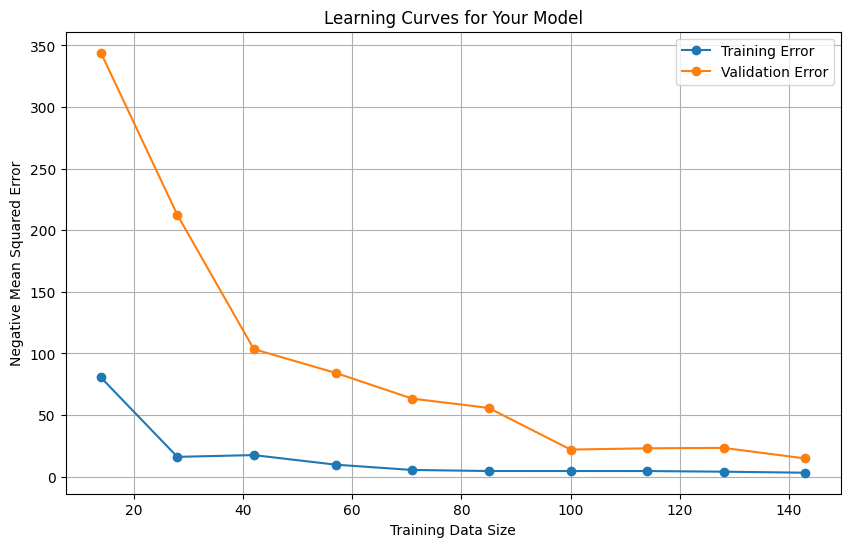

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define a function to create learning curves
def plot_learning_curves(model, X, y, title):
    train_sizes, train_scores, valid_scores = learning_curve(
        model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error'
    )

    train_errors, validation_errors = -train_scores.mean(axis=1), -valid_scores.mean(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_errors, label='Training Error', marker='o')
    plt.plot(train_sizes, validation_errors, label='Validation Error', marker='o')

    plt.title(title)
    plt.xlabel('Training Data Size')
    plt.ylabel('Negative Mean Squared Error')
    plt.legend()
    plt.grid()
    plt.show()



# Plot the learning curves
plot_learning_curves(model, X_train, y_train, 'Learning Curves for Your Model')


### Key Factors influence the HPI

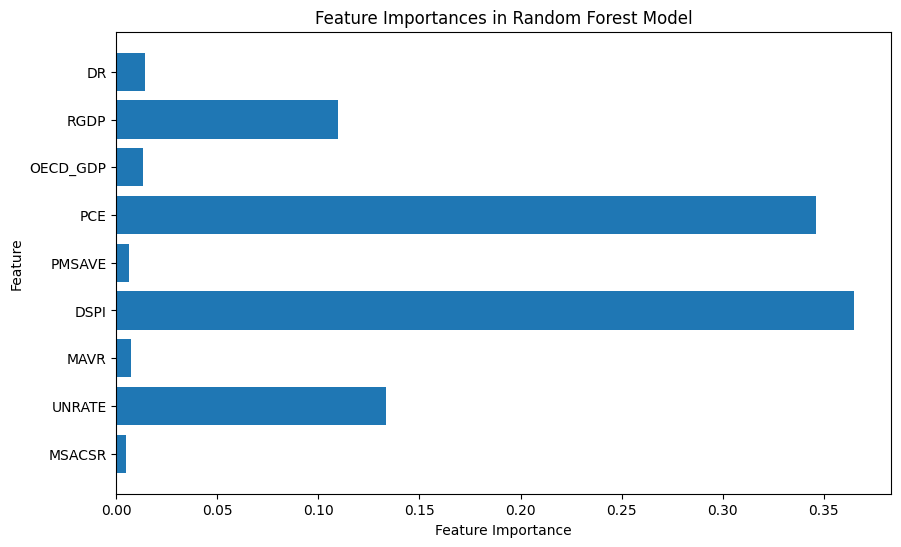

In [17]:
# Get feature importances
feature_importances = model.feature_importances_

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), feature_names) 
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Model')
plt.show()

In [18]:



# Sort feature importances in descending order and get the indices
sorted_indices = np.argsort(feature_importances)[::-1]


top_n = 4 

# Create a DataFrame with the top  most important features and their importance values
top_features_df = pd.DataFrame({
    'Feature': [feature_names[idx] for idx in sorted_indices[:top_n]],
    'Importance': [feature_importances[idx] for idx in sorted_indices[:top_n]]
})


In [19]:
top_features_df

,Feature,Importance
0,DSPI,0.365137
1,PCE,0.346113
2,UNRATE,0.133507
3,RGDP,0.109493


 **This four key features influence the US home price as compare to others**



* `Real Disposable Personal Income (DSPI)`: How much of the earning is actually available to an individual for expenditure. This is an important measure as well, as it takes into account other factors like taxes etc.

* `Personal Consumption Expenditures (PCE)`: Changes in home ownership indicate a combination of factors including change in preferences and attitudes of people towards home buying. Change in cultural trends can only be captured by revealed preferences, and this metric can be taken as a revealed metric for propensity for home buying. The other metric to track changes in preferences is personal consumption expenditure. For example if expenditure is increasing, but there is no such increase in homeownership, it would indicate a change in preferences towards home buying and ownership. Maybe people prefer to rent a home than buying one. Hence, both of these parameters are used.

* `Unemployment Rate (UNRATE)`: Unemployment can also affect both demand and supply in the real estate industry. A high unemployment rate can mean that people simply do not have the money to spend on houses. It can also mean that there is lower investment in the industry and hence lower supply

* `Real Gross Domestic Product (RGDP)`: The GDP is a measure of output of the economy overall, and the health of the economy. An economy that is doing well usually implies more investment and economic activity, and more buying.